## Proyecto: Módulo II. TE y MD

**Espacio de Probabilidad**
- Profesora: Claudia Cristina Reyes Montes de Oca

- Alumno: Mosqueda Becerra Gabriel

- Número de cuenta: 318286897

## Creación de Ambiente

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

## Enfoque Clásico


Cuando hablamos de **probabilidad**, lo primero es definir el marco en el que trabajamos:  
el **espacio de probabilidad**. Este se representa como:

$$
(\Omega, \mathcal{F}, P)
$$

Donde:

- $\Omega$: es el **espacio muestral**, es decir, el conjunto de todos los posibles resultados de un experimento aleatorio.  
- $\mathcal{F}$: es la **familia de eventos**, un conjunto de subconjuntos de $\Omega$ que cumplen ciertas propiedades (por ejemplo, que sea cerrado bajo unión y complemento).  
- $P$: es la **medida de probabilidad**, una función que asigna un número real entre $0$ y $1$ a cada evento $A \in \mathcal{F}$.

---


### Axiomas de Kolmogórov

La teoría moderna de probabilidad se fundamenta en **tres axiomas** propuestos por Kolmogórov (1933):

1. **No negatividad**  
   La probabilidad de cualquier evento es siempre mayor o igual a cero:  

   $$
   P(A) \geq 0 \quad \forall A \in \mathcal{F}
   $$

    *Ejemplo:*  
   Si lanzamos un dado, la probabilidad de obtener un número mayor a 6 es:  
   $$
   P(\varnothing) = 0
   $$
   Nunca puede ser negativa.

---

2. **Normalización**  
   La probabilidad de que ocurra **algún resultado del espacio muestral** es 1:  

   $$
   P(\Omega) = 1
   $$

   *Ejemplo:*  
   En el lanzamiento de un dado:  
   $$
   P(\{1,2,3,4,5,6\}) = 1
   $$
   porque es seguro que salga algún número del 1 al 6.

---

3. **Aditividad (σ-aditividad)**  
   Si dos eventos no se pueden dar al mismo tiempo (es decir, son **mutuamente excluyentes**), la probabilidad de que ocurra uno u otro es la suma de sus probabilidades:  

   $$
   P(A \cup B) = P(A) + P(B), \quad \text{si } A \cap B = \varnothing
   $$

   De manera más general, para una secuencia de eventos disjuntos:  

   $$
   P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i)
   $$

   *Ejemplo:*  
   En el lanzamiento de un dado:  
   - Evento $A$: obtener un **2**  
   - Evento $B$: obtener un **5**  
   Como no pueden ocurrir al mismo tiempo:  

   $$
   P(A \cup B) = P(A) + P(B) = \frac{1}{6} + \frac{1}{6} = \frac{2}{6}
   $$



### Ejemplo intuitivo

Supongamos que lanzamos una moneda:  

- El **espacio muestral** es:
  $$
  \Omega = \{\text{aguila}, \text{sol}\}
  $$

- Un **evento** puede ser:  
  $$
  A = \{\text{aguila}\}
  $$

- La **probabilidad** asignada a $A$ sería:
  $$
  P(A) = \frac{1}{2}
  $$

---

### Ejemplo no tan intuitivo, ¿cómo lo creamos desde cero?

In [2]:
def crear_espacio(omega, prob=None):
    """
    Crea un espacio de probabilidad como un diccionario:
    {resultado: probabilidad}
    """
    n = len(omega)
    if prob is None:  # distribución uniforme
        return {outcome: 1/n for outcome in omega}
    else:
        total = sum(prob.values())
        return {k: v/total for k, v in prob.items()}

def prob_evento(espacio, evento):
    """ Calcula la probabilidad de un evento (subconjunto de omega). """
    return sum(espacio[x] for x in evento if x in espacio)

def verificar_axiomas(espacio):
    """ Verifica los tres axiomas de Kolmogórov. """
    # 1. No negatividad
    no_neg = all(p >= 0 for p in espacio.values())
    # 2. Normalización
    norm = abs(sum(espacio.values()) - 1) < 1e-8
    # 3. Aditividad para eventos disjuntos (partición simple)
    omega = list(espacio.keys())
    mid = len(omega) // 2
    A, B = set(omega[:mid]), set(omega[mid:])
    adit = abs(prob_evento(espacio, A | B) - (prob_evento(espacio, A) + prob_evento(espacio, B))) < 1e-8

    return {"No negatividad": no_neg, "Normalización": norm, "Aditividad": adit}


# ============================
# Ejemplo 1: Dado justo
# ============================
omega_dado = {1, 2, 3, 4, 5, 6}
espacio_dado = crear_espacio(omega_dado)

evento_par = {2, 4, 6}
print("Probabilidad de número par en dado justo:", prob_evento(espacio_dado, evento_par))
print("Axiomas (dado justo):", verificar_axiomas(espacio_dado))


# ============================
# Ejemplo 2: Moneda cargada
# ============================
omega_moneda = {"Cara", "Sello"}
prob_moneda = {"Cara": 0.7, "Sello": 0.3}
espacio_moneda = crear_espacio(omega_moneda, prob_moneda)

print("\nProbabilidad de obtener Cara en moneda cargada:", prob_evento(espacio_moneda, {"Cara"}))
print("Axiomas (moneda cargada):", verificar_axiomas(espacio_moneda))


# ============================
# Ejemplo 3: Monte Carlo para verificar la teoría
# ============================
def simulacion_dado_par(n=100000):
    lanzamientos = [random.randint(1, 6) for _ in range(n)]
    return sum(1 for x in lanzamientos if x % 2 == 0) / n

print("\nProbabilidad estimada por simulación (dado par):", simulacion_dado_par())


Probabilidad de número par en dado justo: 0.5
Axiomas (dado justo): {'No negatividad': True, 'Normalización': True, 'Aditividad': True}

Probabilidad de obtener Cara en moneda cargada: 0.7
Axiomas (moneda cargada): {'No negatividad': True, 'Normalización': True, 'Aditividad': True}

Probabilidad estimada por simulación (dado par): 0.50218


En el **enfoque clásico**, si todos los resultados son igualmente probables, la probabilidad de un evento se calcula como:  

$$
P(A) = \frac{|A|}{|\Omega|}
$$

Donde:  
- $|A|$ = número de resultados favorables.  
- $|\Omega|$ = número total de resultados posibles.  

---

#### Ejemplo: lanzamiento de un dado

- Espacio muestral:  
  $$
  \Omega = \{1,2,3,4,5,6\}
  $$

- Evento: sacar un número par  
  $$
  A = \{2,4,6\}
  $$

- Cálculo de la probabilidad:  
  $$
  P(A) = \frac{|A|}{|\Omega|} = \frac{3}{6} = 0.5
  $$

Es decir, al lanzar un dado justo, hay un **50% de probabilidad** de que salga un número par.


### Probabilidad Laplaciana

Para un experimento aleatorio, se tiene que $\Omega$ es el espacio muestral.

Sea $A$ un evento, entonces

$$ \mathbb{P}(A) = \frac{|A|}{|\Omega|} $$

**Ejemplo** Sea el experimento aleatorio de lanzar una moneda 3 veces, de manera independiente, es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento. El espacio muestral de este experimento es:
$$ \Omega = \{ A,S \} \times \{ A,S \} \times \{ A,S \}  = \{ A,S \}^3$$

$$ (S,S,S),(S,A,S)$$


y se tiene que $|\Omega| = 2^{3}$.

Sean los eventos:
- $A$: todos los resultados son águila
- $S$: todos los resultados son soles
- $E$: por lo menos un resultado es sol

Calcular las probabilidades de $A$, $S$ y $E$.

**Solución** Para $A$, vamos a descomponer al conjunto de la siguiente manera: $A = A_1 \cap A_2 \cap A_3$ donde $A_{i}:$ cae águila en el i-esimo coordenada.

In [3]:
# Vamos a crear el espacio muestral

# Importamos el modulo
import itertools
from itertools import product

In [4]:
Omega = set(product({"A","S"}, repeat=3))
# product -> genera todas las tuplas de longitud 3
# set -> lo convierte en conjunto
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [5]:
# La cardinalidad de Omega es:
len(Omega)

8

In [6]:
# Vamos a crear el evento A1
A_1 = {om for om in Omega if om[0]=="A"}
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [7]:
# Vamos a crear el evento A_2
A_2 = {om for om in Omega if om[1]=="A"}
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [8]:
# Vamos a crear el evento A_2
A_3 = {om for om in Omega if om[2]=="A"}
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [9]:
# Vamos a crear el evento A
A = A_1.intersection(A_2.intersection(A_3))  #A1\cap(A_2 \cap A_3)
A

{('A', 'A', 'A')}

In [10]:
card_A = len(A)

In [11]:
# Calculamos la probabilidad
P_A = card_A / len(Omega)
P_A

0.125

Si yo quiero expresar mi resultado en fracción:

In [12]:
def p(E,Omega):
    p = Fraction(len(E),len(Omega))
    return p

In [13]:
proba_A = p(A,Omega)
proba_A

Fraction(1, 8)

### Probabilidad condicional

Si añadimos condiciones a nuestro experimento en cuestión, la probabilidad cambia.

Definimos la probabilidad de que ocurra un evento $A$ **sabiendo** que ocurre un evento $B$,
$$ \mathbb{P}(A \mid B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} = \frac{|A\cap B|}{|B|}$$
donde $\mathbb{P}(B)>0$.


In [14]:
# Vamos a definir la función para la proba condicional

def prob_cond(E,F):
    return len(E & F) / len(F)

Quiero calcular la probabilidad condicional de los siguientes eventos:

- B: El primer lanzamiento es águila
- C: Dos de los resultados son águila (exactamente)

In [15]:
# El primer lanzamiento es águila
B = {om for om in Omega if om[0]=="A"}
B

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [16]:
# Dos de los resultados son águila
C = {om for om in Omega if om.count("A")==2}
C

{('A', 'A', 'S'), ('A', 'S', 'A'), ('S', 'A', 'A')}

In [17]:
prob_cond(B,C)

0.6666666666666666

### Independencia de eventos

Decimos que dos eventos $A$ y $B$ son independientes si
$$ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$$
o de manera equivalente
$$ \mathbb{P}(A \mid B) \mathbb{P}(A) $$

In [18]:
def prob(E):
    return len(E) / len(Omega)

In [19]:
def indep(E,F):
    return prob(E & F) == prob(E)*prob(F)

In [20]:
indep(B,C)

False

### **EJEMPLO**
Sea el experimento aleatorio de lanzar un dado dos veces. Sabemos que el espacio muestral es el siguiente:
$$ \Omega = \{(i,j) \mid i,j \in \{1,2,3,4,5,6\} \}$$
y además $|\Omega|=6^2 = 36$

In [21]:
Omega_dado = set(product([1,2,3,4,5,6],repeat=2))
Omega_dado

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [22]:
card_Om2 = len(Omega_dado)
card_Om2

36

Definimos el evento
- $S_n$: la suma de los dados es $n$, es decir,
  $$ S_n = \{(i,j)\in\Omega \mid i+j = n \}$$   

In [23]:
def S(n):
    Sn = { (i,j) for i in range(1,7) for j in range(1,7) if i+j == n}
    # range genera una secuencia de numeros enteros del 1 al 6
    return Sn

In [24]:
S_nueve = S(9)
S_nueve

{(3, 6), (4, 5), (5, 4), (6, 3)}

In [25]:
len(S_nueve) / card_Om2

0.1111111111111111

**Ejercicio** Calcular las probabilidades faltantes
- a) $S$: todos los resultados son soles
- b) $E$: por lo menos un resultado es sol

Inciso a)

In [26]:
# Creamos el espacio muestral
import itertools
from itertools import product

In [27]:
# El espacio muestral del lanzamiento de n veces una moneda
omega = set(product(("A","S"),repeat=3))
# poduct genera todas las tuplas de longitud n y set lo vuelve conjunto
omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [28]:
# Creamos evento S_n ie considera que los lanzamientos fueron sol
S_1  = {om for om in omega if om[0]=="S"}
S_2  = {om for om in omega if om[1]=="S"}
S_3  = {om for om in omega if om[2]=="S"}

In [29]:
S = S_1.intersection(S_2.intersection(S_3))
S

{('S', 'S', 'S')}

In [30]:
card_S  = len(S)
P_S = len(S)/len(omega)
print(f'La probabilidad es de: {P_S*100}%')

La probabilidad es de: 12.5%


In [31]:
E = {om for om in omega if "S" in om}
E

{('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [32]:
print(f'La probabilidd es de: {len(E)/len(omega)*100}%')

La probabilidd es de: 87.5%


## Enfoque Geométrico

El **enfoque geométrico** se aplica cuando los **puntos del espacio muestral**
son infinitos y se distribuyen de manera continua y uniforme.

La probabilidad de un evento \(A\) se define como:

$$
P(A) = \frac{\text{Medida geométrica de } A}{\text{Medida geométrica de } \Omega}
$$

donde la medida puede ser **longitud**, **área** o **volumen**,
dependiendo del problema.

---



**Ejemplo : Punto aleatorio en un intervalo**

Supongamos que elegimos un punto al azar en el intervalo \([0,1]\).  
¿Cuál es la probabilidad de que el punto caiga en el subintervalo \([0.2, 0.5]\)?

$$
P([0.2, 0.5]) = \frac{0.5 - 0.2}{1 - 0} = 0.3
$$


In [33]:
# Simulación frecuentista del ejemplo
n = 100_000
puntos = np.random.rand(n)  # valores uniformes en [0,1]
prob = np.mean((puntos >= 0.2) & (puntos <= 0.5))
prob


np.float64(0.30071)

**Ejemplo : Punto aleatorio en un círculo 🎯**

Supongamos que lanzamos un dardo sobre un círculo de radio 1.  
¿Cuál es la probabilidad de que caiga dentro de un círculo concéntrico de radio 0.5?

In [34]:
# Simulación del ejemplo del círculo
n = 200_000
x, y = np.random.rand(n)*2 - 1, np.random.rand(n)*2 - 1  # puntos en [-1,1]x[-1,1]
dist = np.sqrt(x**2 + y**2)

# Evento: caer en el círculo pequeño
prob_circulo = np.mean((dist <= 0.5) & (dist <= 1))
prob_circulo


np.float64(0.196425)

**Ejemplo : El problema del encuentro ⏰**

Dos personas acuerdan encontrarse entre las 0 y 60 minutos de una hora.  
Cada una llega a un tiempo **uniforme e independiente** entre 0 y 60 minutos.  
Se van si la diferencia de llegada es mayor a 15 minutos.  

¿Cuál es la probabilidad de que se encuentren?

---

#### Representación geométrica

- El espacio muestral \(\Omega\) es el cuadrado de lado 60:  
  todas las posibles parejas de tiempos \((X,Y)\).

- El evento \(A\) es la región donde:  

$$
|X - Y| \leq 15
$$

- La probabilidad es:  

$$
P(A) = \frac{\text{Área de la región válida}}{\text{Área total del cuadrado}}
$$


Probabilidad estimada ≈ 0.4386


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


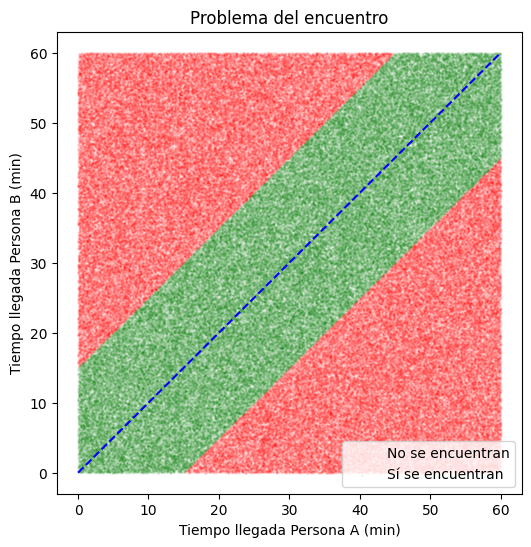

In [35]:
n = 300_000
x = np.random.uniform(0, 60, n)
y = np.random.uniform(0, 60, n)

encuentro = np.abs(x - y) <= 15
prob_encuentro = np.mean(encuentro)
print(f"Probabilidad estimada ≈ {prob_encuentro:.4f}")

# Gráfica
plt.figure(figsize=(6,6))
plt.scatter(x[~encuentro], y[~encuentro], s=1, alpha=0.05, color="red", label="No se encuentran")
plt.scatter(x[encuentro], y[encuentro], s=1, alpha=0.05, color="green", label="Sí se encuentran")
plt.plot([0,60],[0,60], color="blue", linestyle="--")
plt.title("Problema del encuentro")
plt.xlabel("Tiempo llegada Persona A (min)")
plt.ylabel("Tiempo llegada Persona B (min)")
plt.legend()
plt.show()


## Enfoque Frecuentista


El espacio muestral es un conjunto finito, y podemois definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n(A)}{n} $$

donde $n(A)$ es el número de veces que ocurre $A$ y $n$ es el número de veces qye se realiza el experiemento.

In [36]:
import random #para generar números aleatorios

Se tiene el lanzamiento de monedas (no justas) ---> volados

In [37]:
def volado(p): #regresa la proba de obtener sol
    return 'sol' if random.random() < p else 'águila' #random.random() genera un número entre 0 y 1

In [38]:
volado(0.4)

'sol'

In [39]:
# Vamos a realizar 10 volados con p=0.4
a = [volado(0.4) for i in range(10)] # creando una lista
a

['águila',
 'águila',
 'sol',
 'águila',
 'sol',
 'sol',
 'águila',
 'águila',
 'sol',
 'sol']

In [40]:
# Para contar el número de soles en una lista
a.count('sol')

5

In [41]:
a.count('águila')

5

In [42]:
# Tambien se puede hacer con un bucle
resultados = [] #lista vacia
for i in range(10):
    resultado = volado(0.4)
    resultados.append(resultado)
resultados

['águila',
 'águila',
 'águila',
 'águila',
 'sol',
 'águila',
 'águila',
 'sol',
 'águila',
 'águila']

**Ahora vamos a simular nuestra probabilidad frecuentista**

In [43]:
p = [] #lista vacia para almacenar probabilidades

for i in range(1000): #realizamos 1000 experimentos
    N = 1000 #cada experimento tiene 1000 volados
    resultados = [] #almacena 'sol' o 'águila' de ese experimento

    for i in range(N):
        resultado = volado(0.63)
        resultados.append(resultado)

    n_soles = resultados.count('sol') #cuenta el número de soles
    p_soles = n_soles / N #calcula la probabilidad frecuentista

    p.append(p_soles) #almacena las probabilidades en la lista p

# Probabilidad frecuentista promedio
p_soles_prom = sum(p) / 1000 # por la Ley de los Grandes Números

print(f'Probabilidad frecuentista promedio de obtener sol: {p_soles_prom}')

Probabilidad frecuentista promedio de obtener sol: 0.6296889999999999


**Ejemplo extra**


**Ejemplo: El problema del cumpleaños**

El **enfoque frecuentista** interpreta la probabilidad como la frecuencia relativa
de un evento después de un número grande de repeticiones de un experimento.  

Un ejemplo interesante es el **problema del cumpleaños**:  
> ¿Cuál es la probabilidad de que en un grupo de \( n \) personas, al menos dos cumplan años el mismo día?

El espacio muestral está formado por todos los posibles días de cumpleaños
para cada persona (\(365^n\)).  
El evento de interés es “al menos dos personas comparten cumpleaños”.

Como es difícil calcular directamente todos los casos posibles, usamos simulación:  
- Repetimos el experimento muchas veces.  
- Calculamos la frecuencia relativa del evento.  
- Esa frecuencia se interpreta como una aproximación frecuentista de la probabilidad.  


In [44]:
def cumple_simulacion(n_personas, n_simulaciones=100_000):
    """
    Enfoque frecuentista para el problema del cumpleaños:
    Calcula la probabilidad de que al menos dos personas compartan cumpleaños.
    """
    exitos = 0

    for _ in range(n_simulaciones):
        # Generamos cumpleaños aleatorios (días entre 1 y 365)
        cumple = np.random.randint(1, 366, size=n_personas)

        # Revisamos si hay duplicados (alguien comparte cumpleaños)
        if len(cumple) != len(set(cumple)):
            exitos += 1

    return exitos / n_simulaciones


In [45]:
# Probabilidades frecuentistas para diferentes tamaños de grupo
for n in [5, 10, 20, 23, 30, 50]:
    prob = cumple_simulacion(n)
    print(f"n = {n:2d} personas → P(al menos dos comparten cumpleaños) ≈ {prob:.4f}")

n =  5 personas → P(al menos dos comparten cumpleaños) ≈ 0.0272
n = 10 personas → P(al menos dos comparten cumpleaños) ≈ 0.1170
n = 20 personas → P(al menos dos comparten cumpleaños) ≈ 0.4128
n = 23 personas → P(al menos dos comparten cumpleaños) ≈ 0.5082
n = 30 personas → P(al menos dos comparten cumpleaños) ≈ 0.7044
n = 50 personas → P(al menos dos comparten cumpleaños) ≈ 0.9707


## Bibliografía


**Rincón, L.** (2014). *Introducción a la probabilidad* Facultad de Ciencias, UNAM.

**Ross, S. M**. (2014). A First Course in Probability (9th ed.). Pearson.